In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("/content/HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data['Department'] = pd.Categorical(data['Department'])
data['Department'] = data['Department'].cat.codes

In [5]:
data['salary'] = pd.Categorical(data['salary'])
data['salary'] = data['salary'].cat.codes

In [6]:
X = data.drop("left",axis=1).values

In [7]:
X

array([[0.38, 0.53, 2.  , ..., 0.  , 7.  , 1.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 7.  , 2.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 7.  , 2.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 8.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 8.  , 1.  ]])

In [8]:
y = data['left']

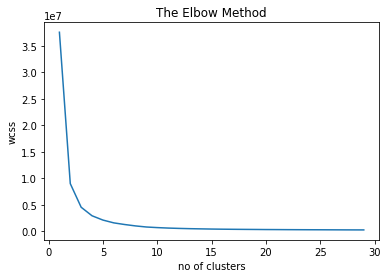

In [9]:
wcss=[]
k = range(1,30)
for i in k:
  kmodel = KMeans(n_clusters= i)
  kmodel.fit(X)
  wcss.append(kmodel.inertia_)

plt.plot(k, wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
k_means = KMeans(n_clusters=3,init='k-means++',max_iter=500,random_state=42)

In [11]:
Result = k_means.fit_predict(X,y)

In [12]:
Result

array([2, 1, 1, ..., 2, 1, 2], dtype=int32)

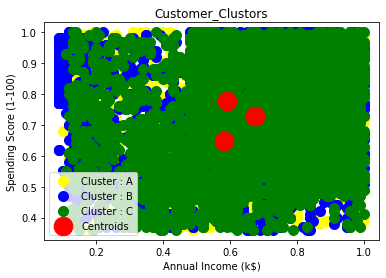

In [13]:
plt.scatter(X[Result == 0, 0], X[Result == 0, 1], s = 100, c = 'yellow', label = 'Cluster : A')
plt.scatter(X[Result == 1, 0], X[Result == 1, 1], s = 100, c = 'blue', label = 'Cluster : B')
plt.scatter(X[Result == 2, 0], X[Result == 2, 1], s = 100, c = 'green', label = 'Cluster : C')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 350, c = 'red', label = 'Centroids')
plt.title('Customer_Clustors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()